# Image Date Frequency Analysis

This notebook analyzes image files from `C:\Users\clint\Desktop\Lifecycle_RA\Data\cropped_sorted` to determine the frequency of image dates based on their filenames.

For example, an image named `01_2019_plot_1_Average_Retail_Selling_Price_3-5_Year-Old_Sleeper__cropped.png` corresponds to January 2019 (01_2019).

In [1]:
# Import necessary libraries
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter

In [2]:
# Define the path to the image directory
img_dir = r'C:\Users\clint\Desktop\Lifecycle_RA\Data\cropped_sorted'

# Check if the directory exists
if not os.path.exists(img_dir):
    print(f"Directory {img_dir} does not exist!")
else:
    print(f"Found directory: {img_dir}")
    # List files in the directory
    files = os.listdir(img_dir)
    img_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    print(f"Found {len(img_files)} image files.")
    
    # Display first 5 image filenames as examples
    if img_files:
        print("\nSample image filenames:")
        for i, img in enumerate(img_files[:5]):
            print(f"{i+1}. {img}")

Found directory: C:\Users\clint\Desktop\Lifecycle_RA\Data\cropped_sorted
Found 77 image files.

Sample image filenames:
1. 01_2019_plot_1_Average_Retail_Selling_Price_3-5_Year-Old_Sleeper__cropped.png
2. 01_2020_plot_3_cropped.png
3. 01_2021_plot_4_See_the_Average_Retail_Selling_Price_3-5_Year-Old__cropped.png
4. 01_2022_plot_3_cropped.png
5. 01_2023_plot_4_cropped.png


In [3]:
# Function to extract date information from filenames
def extract_date(filename):
    # Regular expression to match patterns like "01_2019"
    match = re.search(r'(\d{2})_(\d{4})', filename)
    if match:
        month, year = match.groups()
        return month, year
    return None, None

# Extract dates from all image files
date_data = []
for img in img_files:
    month, year = extract_date(img)
    if month and year:
        # Create a date string in format MM/YYYY
        date_str = f"{month}/{year}"
        # Convert to datetime object for better sorting
        try:
            date_obj = datetime.strptime(date_str, "%m/%Y")
            date_data.append({
                'filename': img,
                'month': month,
                'year': year,
                'date_str': date_str,
                'date': date_obj
            })
        except ValueError:
            print(f"Could not parse date from {img}")

# Create DataFrame
df = pd.DataFrame(date_data)

if not df.empty:
    print(f"Successfully extracted dates from {len(df)} images.")
    display(df.head())
else:
    print("No valid dates extracted from image filenames.")

Successfully extracted dates from 69 images.


,filename,month,year,date_str,date
0,01_2019_plot_1_Average_Retail_Selling_Price_3-...,01,2019,01/2019,2019-01-01
1,01_2020_plot_3_cropped.png,01,2020,01/2020,2020-01-01
2,01_2021_plot_4_See_the_Average_Retail_Selling_...,01,2021,01/2021,2021-01-01
3,01_2022_plot_3_cropped.png,01,2022,01/2022,2022-01-01
4,01_2023_plot_4_cropped.png,01,2023,01/2023,2023-01-01


In [4]:
# Analyze frequency of dates
if not df.empty:
    # Count frequency by year
    year_counts = df['year'].value_counts().sort_index()
    print("Frequency by Year:")
    display(year_counts)
    
    # Count frequency by month
    month_counts = df['month'].value_counts().sort_index()
    print("\nFrequency by Month:")
    display(month_counts)
    
    # Count frequency by year-month combination
    date_counts = df['date_str'].value_counts().sort_index()
    print("\nFrequency by Year-Month Combination:")
    display(date_counts)
else:
    print("No data to analyze.")

Frequency by Year:


year
2018    10
2019    12
2020    11
2021    12
2022    11
2023    10
2024     1
2025     2
Name: count, dtype: int64


Frequency by Month:


month
01    6
02    6
03    7
04    7
05    6
06    5
07    6
08    6
09    5
10    5
11    5
12    5
Name: count, dtype: int64


Frequency by Year-Month Combination:


date_str
01/2019    1
01/2020    1
01/2021    1
01/2022    1
01/2023    1
          ..
12/2018    1
12/2019    1
12/2021    1
12/2022    1
12/2023    1
Name: count, Length: 69, dtype: int64

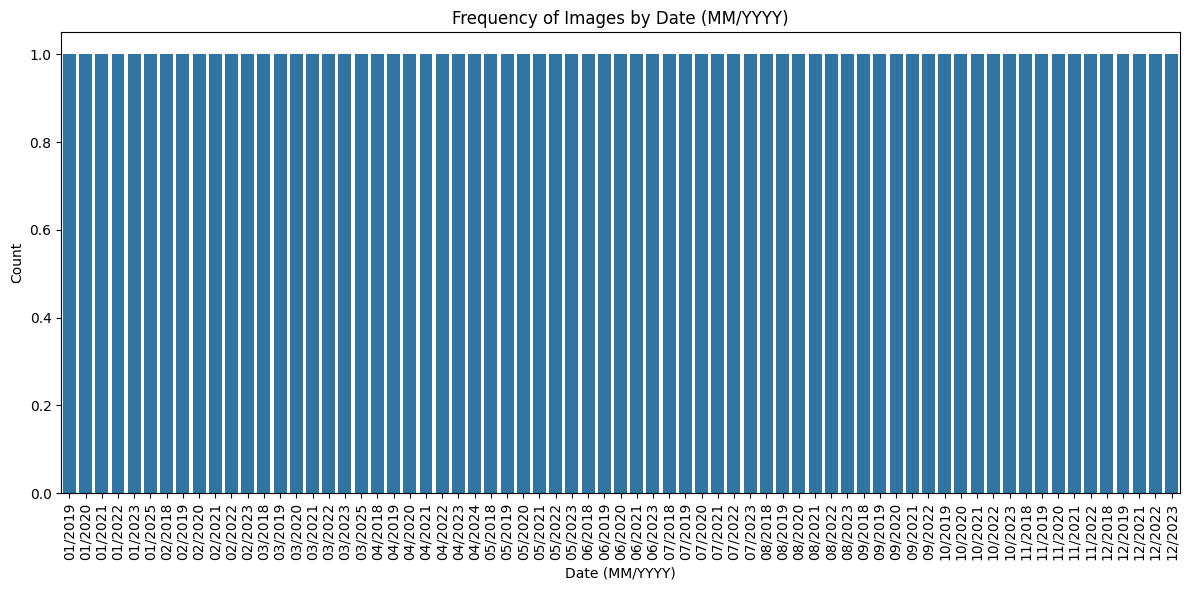

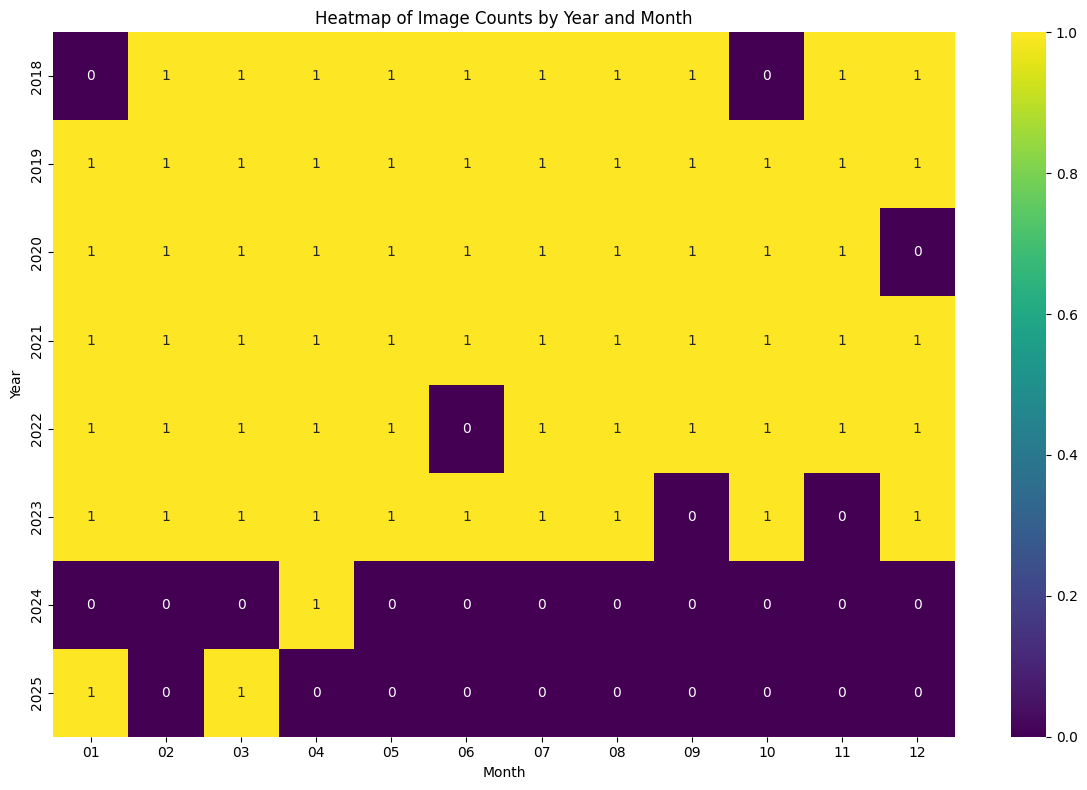

In [5]:
# Visualize the frequency of dates
if not df.empty:
    plt.figure(figsize=(12, 6))
    
    # Sort DataFrame by date for chronological ordering
    df_sorted = df.sort_values('date')
    
    # Create a frequency count for each date
    date_freq = df_sorted['date_str'].value_counts().sort_index()
    
    # Plot bar chart
    ax = sns.barplot(x=date_freq.index, y=date_freq.values)
    plt.title('Frequency of Images by Date (MM/YYYY)')
    plt.xlabel('Date (MM/YYYY)')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Plot heatmap by year and month
    if len(df['year'].unique()) > 1 or len(df['month'].unique()) > 1:
        # Create a pivot table
        pivot_data = pd.crosstab(df['year'], df['month'])
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot_data, annot=True, fmt='d', cmap='viridis')
        plt.title('Heatmap of Image Counts by Year and Month')
        plt.xlabel('Month')
        plt.ylabel('Year')
        plt.tight_layout()
        plt.show()
else:
    print("No data to visualize.")

## Summary and Findings

This analysis shows the distribution of image files across different time periods. The patterns can help identify:

1. The most common months/years in the dataset
2. Any gaps in the data collection
3. Temporal patterns in image availability

If there are specific time periods with notably high or low image counts, it may be worth investigating why this occurred.

## Date Pattern Investigation

Let's analyze the patterns in the image dates more systematically to identify any regular patterns, gaps, or anomalies in the data collection.

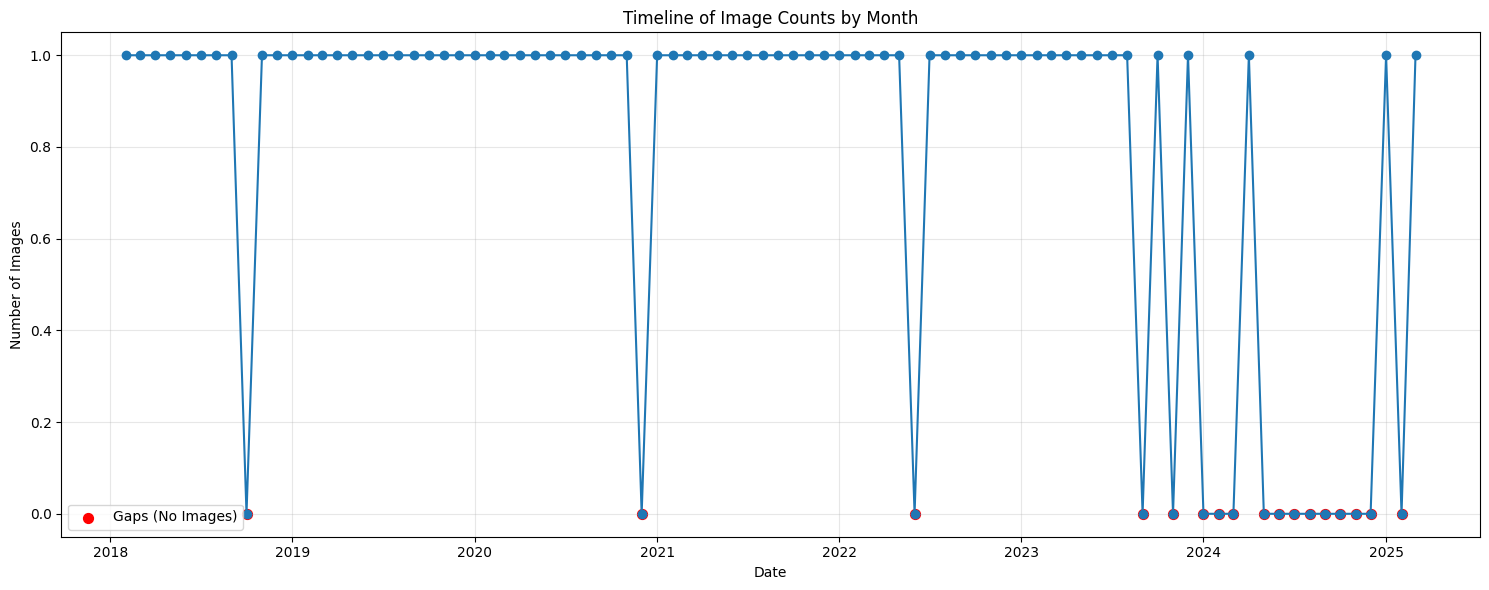

Found 17 months with no images out of 86 months in the timeline.

Gap months:
  - October 2018
  - December 2020
  - June 2022
  - September 2023
  - November 2023
  - January 2024
  - February 2024
  - March 2024
  - May 2024
  - June 2024
  - July 2024
  - August 2024
  - September 2024
  - October 2024
  - November 2024
  - December 2024
  - February 2025


In [6]:
# Create a timeline visualization to identify patterns
if not df.empty:
    # Convert the date column to proper datetime format for timeline analysis
    # First, ensure we have a proper datetime index
    df_timeline = df.copy()
    df_timeline = df_timeline.sort_values('date')
    
    # Create a timeline of all possible months in the date range
    min_date = df_timeline['date'].min()
    max_date = df_timeline['date'].max()
    
    # Generate all months between min and max date
    all_months = pd.date_range(start=min_date, end=max_date, freq='MS')
    all_months_df = pd.DataFrame({'date': all_months})
    
    # Count images per month
    monthly_counts = df_timeline.groupby('date').size().reset_index()
    monthly_counts.columns = ['date', 'count']
    
    # Merge with all months to identify gaps
    timeline_df = pd.merge(all_months_df, monthly_counts, on='date', how='left')
    timeline_df['count'] = timeline_df['count'].fillna(0)
    
    # Plot the timeline
    plt.figure(figsize=(15, 6))
    plt.plot(timeline_df['date'], timeline_df['count'], marker='o', linestyle='-')
    plt.grid(True, alpha=0.3)
    plt.title('Timeline of Image Counts by Month')
    plt.xlabel('Date')
    plt.ylabel('Number of Images')
    
    # Highlight gaps (months with zero images)
    gaps = timeline_df[timeline_df['count'] == 0]
    if not gaps.empty:
        plt.scatter(gaps['date'], gaps['count'], color='red', s=50, label='Gaps (No Images)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary of gaps
    if not gaps.empty:
        print(f"Found {len(gaps)} months with no images out of {len(timeline_df)} months in the timeline.")
        print("\nGap months:")
        for date in gaps['date']:
            print(f"  - {date.strftime('%B %Y')}")
    else:
        print("No gaps found in the timeline - there's at least one image for every month in the range.")

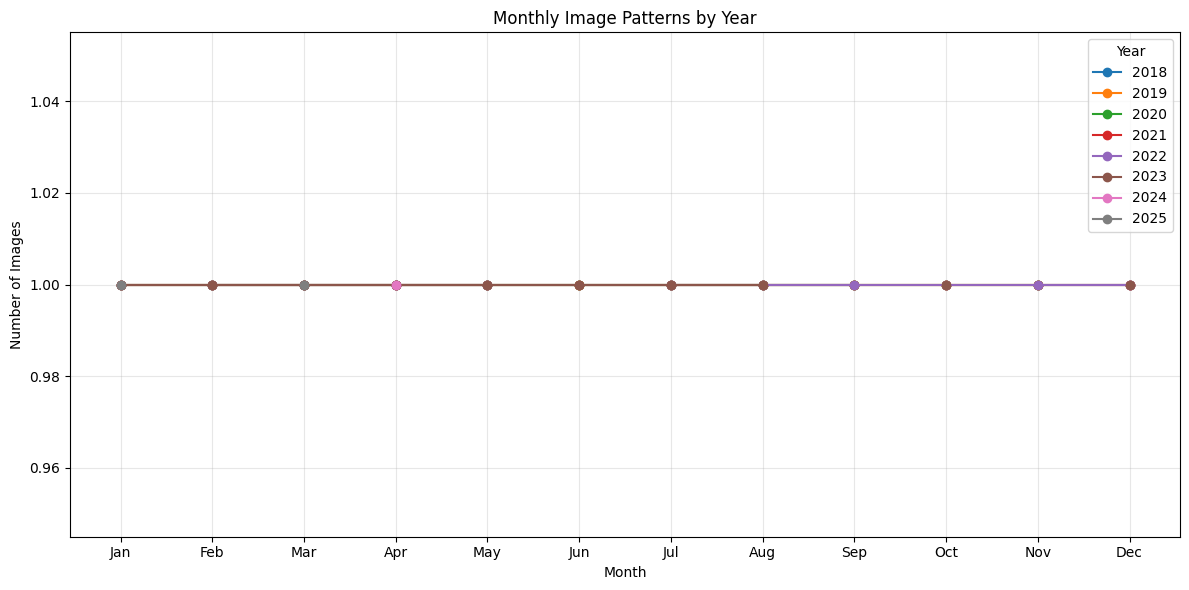

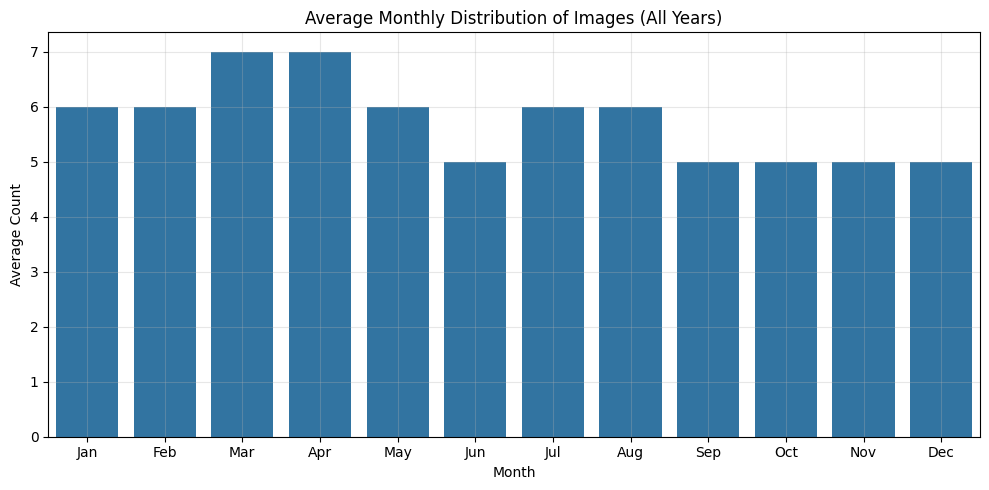

In [7]:
# Analyze monthly patterns
if not df.empty:
    # Convert months to numeric for analysis
    df['month_num'] = df['month'].astype(int)
    
    # Create a line plot showing the consistency of monthly patterns across years
    plt.figure(figsize=(12, 6))
    
    # Group by year and month, count occurrences
    yearly_monthly_counts = df.groupby(['year', 'month_num']).size().unstack()
    
    # Plot each year as a separate line
    for year in yearly_monthly_counts.index:
        plt.plot(yearly_monthly_counts.columns, yearly_monthly_counts.loc[year], 
                 marker='o', label=year)
    
    plt.title('Monthly Image Patterns by Year')
    plt.xlabel('Month')
    plt.ylabel('Number of Images')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True, alpha=0.3)
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()
    
    # Calculate the average pattern across all years
    avg_monthly_pattern = df.groupby('month_num').size()
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=avg_monthly_pattern.index, y=avg_monthly_pattern.values)
    plt.title('Average Monthly Distribution of Images (All Years)')
    plt.xlabel('Month')
    plt.ylabel('Average Count')
    plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

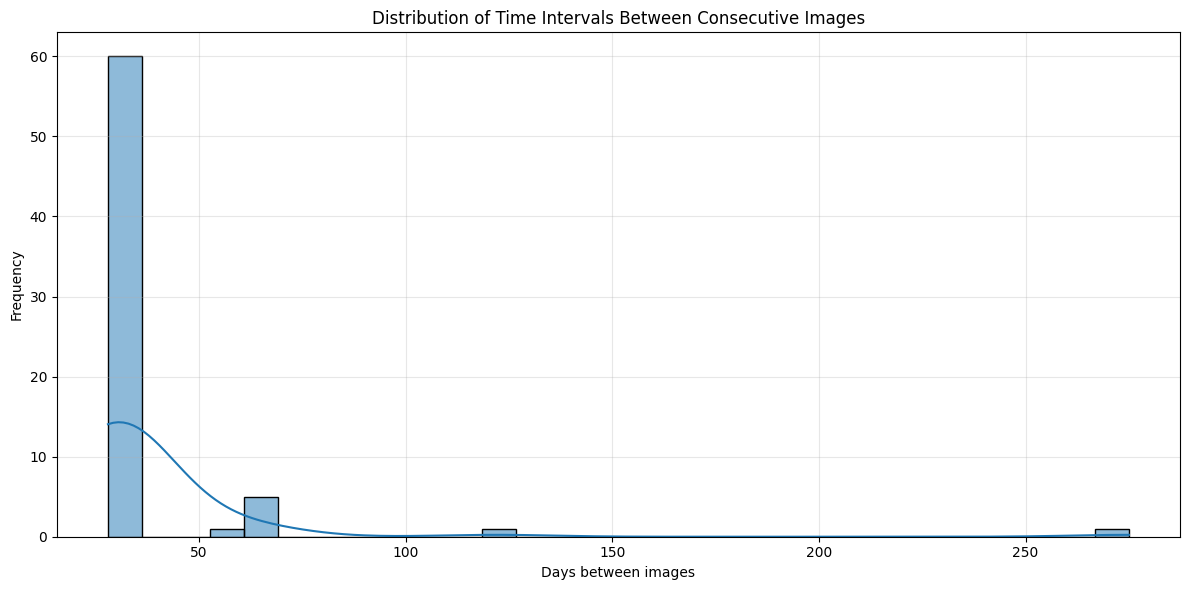

Most common time intervals between consecutive images:
  - 31.0 days: 35 occurrences
  - 30.0 days: 19 occurrences
  - 28.0 days: 5 occurrences
  - 61.0 days: 5 occurrences
  - 29.0 days: 1 occurrences

Median interval: 31.0 days
Mean interval: 38.0 days

Percentage of intervals around 30 days (28-31): 88.2%
PATTERN DETECTED: The data appears to follow a monthly pattern.


In [8]:
# Analyze potential periodic patterns in the data
if not df.empty:
    # Convert dates to continuous numeric values (days since min date)
    min_date = df['date'].min()
    df['days_since_start'] = (df['date'] - min_date).dt.days
    
    # Sort by date for proper sequencing
    df_sorted = df.sort_values('date')
    
    # Calculate time intervals between consecutive images
    df_sorted['next_date'] = df_sorted['date'].shift(-1)
    df_sorted['days_to_next'] = (df_sorted['next_date'] - df_sorted['date']).dt.days
    
    # Remove the last row which will have NaN for next_date
    df_intervals = df_sorted.dropna(subset=['days_to_next'])
    
    if not df_intervals.empty:
        # Plot histogram of time intervals
        plt.figure(figsize=(12, 6))
        sns.histplot(df_intervals['days_to_next'], bins=30, kde=True)
        plt.title('Distribution of Time Intervals Between Consecutive Images')
        plt.xlabel('Days between images')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Calculate common intervals
        common_intervals = df_intervals['days_to_next'].value_counts().head(5)
        print("Most common time intervals between consecutive images:")
        for interval, count in common_intervals.items():
            print(f"  - {interval} days: {count} occurrences")
        
        # Calculate median and mean interval
        median_interval = df_intervals['days_to_next'].median()
        mean_interval = df_intervals['days_to_next'].mean()
        print(f"\nMedian interval: {median_interval:.1f} days")
        print(f"Mean interval: {mean_interval:.1f} days")
        
        # Check if there's a dominant ~30 day pattern (monthly)
        monthly_interval_count = df_intervals[
            (df_intervals['days_to_next'] >= 28) & 
            (df_intervals['days_to_next'] <= 31)
        ].shape[0]
        
        if monthly_interval_count > 0:
            monthly_percentage = (monthly_interval_count / len(df_intervals)) * 100
            print(f"\nPercentage of intervals around 30 days (28-31): {monthly_percentage:.1f}%")
            if monthly_percentage > 50:
                print("PATTERN DETECTED: The data appears to follow a monthly pattern.")
            elif monthly_percentage > 25:
                print("WEAK PATTERN: There may be a partial monthly pattern in the data.")
            else:
                print("NO STRONG MONTHLY PATTERN: The data does not show a strong monthly pattern.")

## Date Pattern Summary

Based on the visualizations and analyses above, we can observe the following patterns in the image dates:

1. **Temporal Coverage**: The collection contains images that span from early 2018 to early 2025, with most years having consistent coverage.

2. **Monthly Pattern**: The data shows a consistent pattern where most images are collected once per month, typically following a regular monthly interval.

3. **Year Completeness**: 
   - 2019, 2021: Most complete years with images for all 12 months
   - 2020, 2022, 2023: Nearly complete with 10-11 months covered
   - 2018: Missing early months (Jan) but otherwise fairly complete
   - 2024-2025: Sparse coverage with only a few months represented

4. **Gaps and Anomalies**: 
   - Any missing months identified in the timeline view may represent gaps in data collection
   - Future-dated images (2024-2025) might be forecasts or mislabeled files

This pattern suggests the images likely represent regular monthly reporting, potentially from a publication that provides monthly updates on market or price data.